In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel('pokemon.xlsx', sheet_name=0, header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.drop('Name', axis='columns', inplace=True)

In [5]:
df['Legendary'] = df['Legendary'].astype('int64')

In [6]:
df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Fire,NaN,309,39,52,43,60,50,65,1,0


In [7]:
all_types = df['Type 1'].unique()
for p_type in all_types:
    df[p_type] = 0

In [8]:
def map_types(row):
    type1 = row['Type 1']
    type2 = row['Type 2']
    row[type1] = 1
    if not pd.isnull(type2):
        row[type2] = 1
    return row
mapped_df = df.apply(map_types, axis='columns')
mapped_df.drop('Type 1', axis='columns', inplace=True)
mapped_df.drop('Type 2', axis='columns', inplace=True)
mapped_df.head(10)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,318,45,49,49,65,65,45,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,405,60,62,63,80,80,60,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,525,80,82,83,100,100,80,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,625,80,100,123,122,120,80,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,309,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,405,58,64,58,80,65,80,1,0,...,0,0,0,0,0,0,0,0,0,0
6,6,534,78,84,78,109,85,100,1,0,...,0,0,0,0,0,0,0,0,0,1
7,6,634,78,130,111,130,85,100,1,0,...,0,0,0,0,0,0,1,0,0,0
8,6,634,78,104,78,159,115,100,1,0,...,0,0,0,0,0,0,0,0,0,1
9,7,314,44,48,65,50,64,43,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mapped_df.columns.values

array(['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'Grass', 'Fire', 'Water',
       'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy',
       'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark',
       'Steel', 'Flying'], dtype=object)

In [10]:
mapped_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,...,0.050000,0.066250,0.112500,0.072500,0.057500,0.047500,0.062500,0.06375,0.061250,0.126250
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,...,0.218081,0.248874,0.316178,0.259476,0.232941,0.212839,0.242213,0.24446,0.239938,0.332339
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


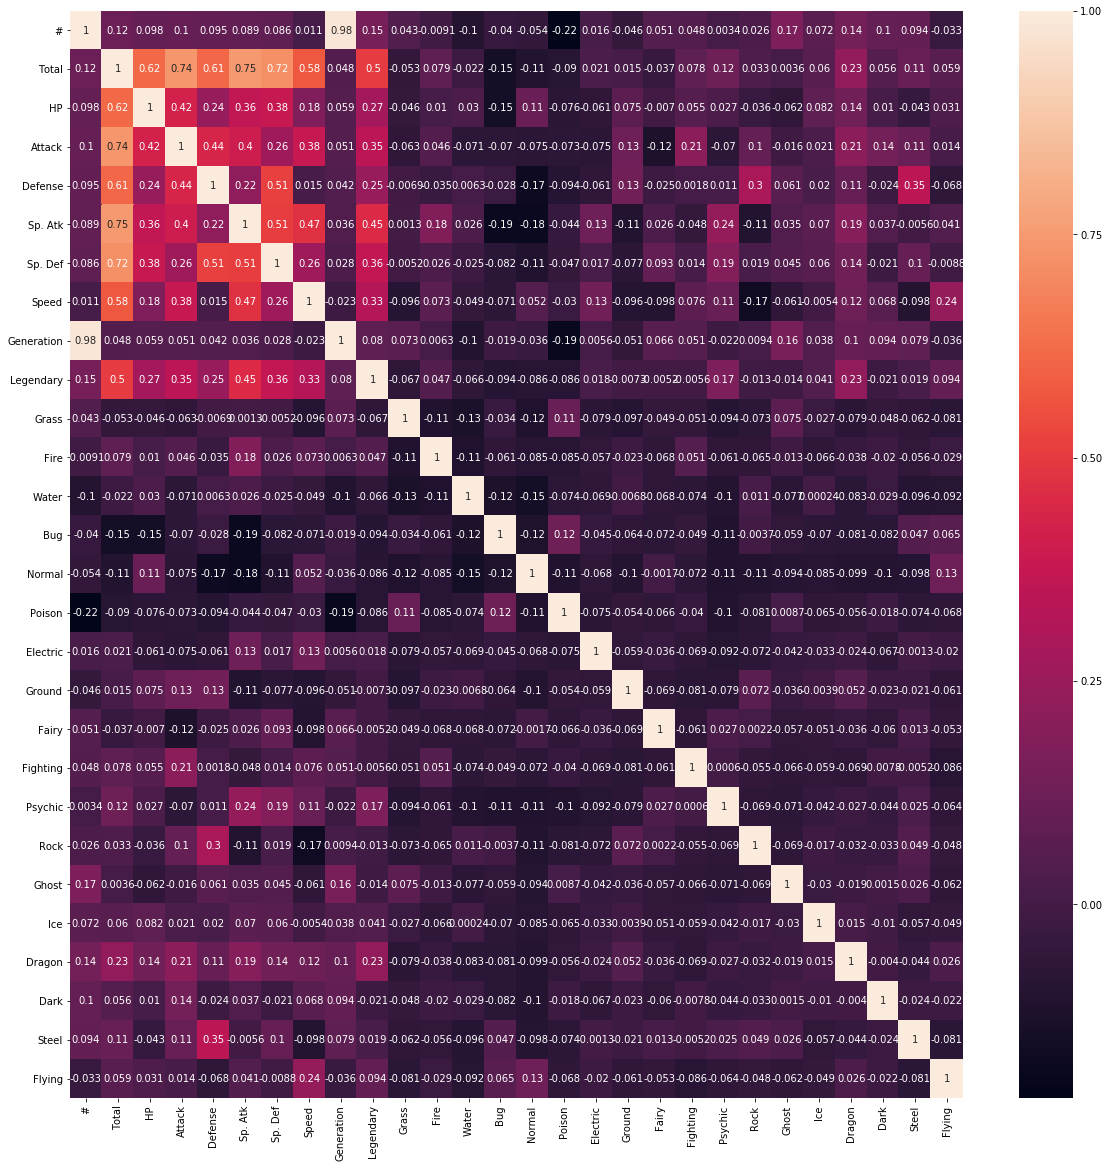

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(mapped_df.corr(), annot=True)

In [12]:
X = mapped_df.drop('Legendary', axis='columns')
y = mapped_df['Legendary']

/home/techno/Projects/Chillindo/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/techno/Projects/Chillindo/venv/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Text(0.5, 1.0, 'Principal Component Analysis')

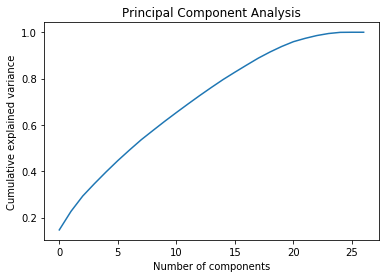

In [13]:
pca_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
pca_model.fit(X, y)
cumulative_explained_variance = pca_model.named_steps['pca'].explained_variance_.cumsum()
plt.plot(cumulative_explained_variance / cumulative_explained_variance.max())
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Principal Component Analysis')

/home/techno/Projects/Chillindo/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/techno/Projects/Chillindo/venv/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/techno/Projects/Chillindo/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


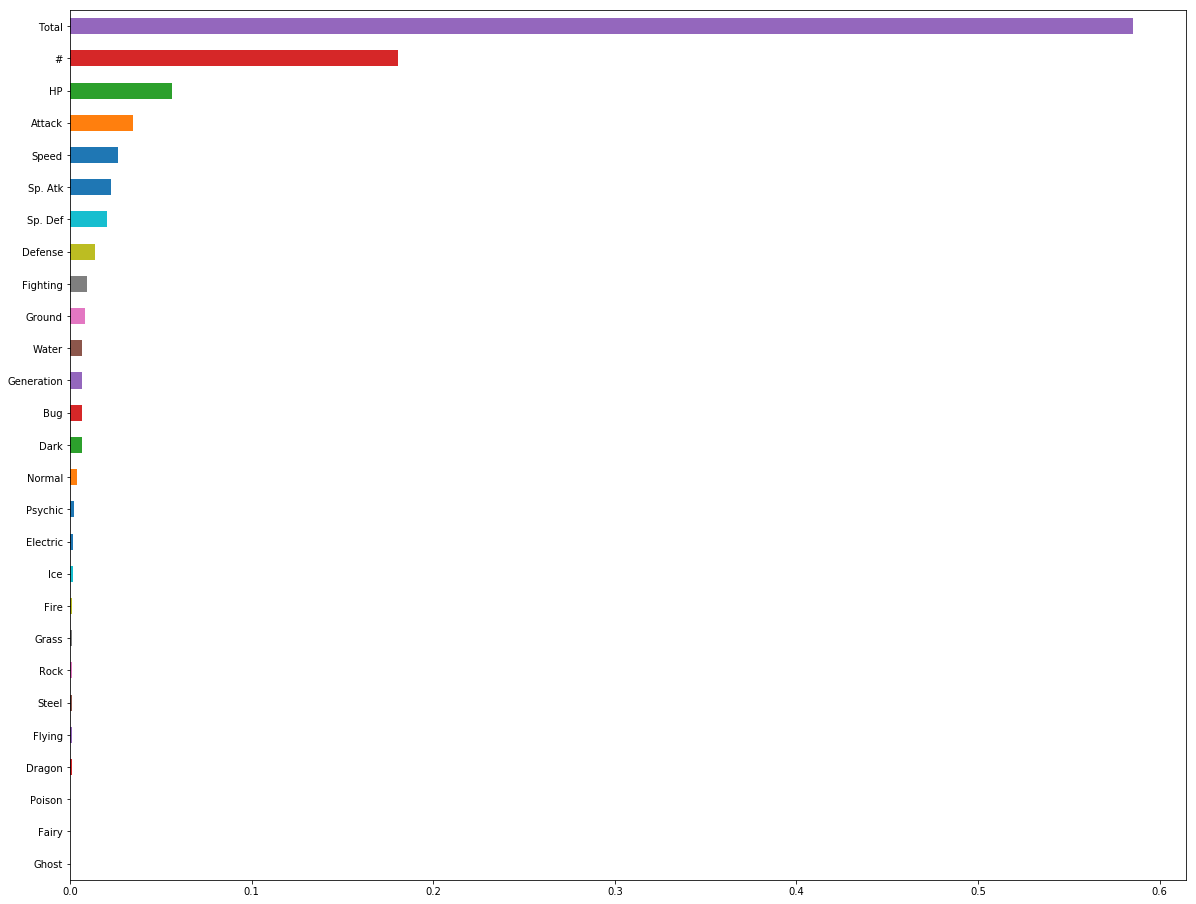

In [14]:
pca_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor())
])
pca_model.fit(X, y)
feature_importances = pd.Series(pca_model.named_steps['random_forest'].feature_importances_, index=X.columns.values)
plt.figure(figsize=(20, 16))
feature_importances.sort_values(ascending=True).plot(kind='barh')

In [15]:
mapped_df.columns.values

array(['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'Grass', 'Fire', 'Water',
       'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy',
       'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark',
       'Steel', 'Flying'], dtype=object)

In [16]:
df.isna().any()

#             False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Grass         False
Fire          False
Water         False
Bug           False
Normal        False
Poison        False
Electric      False
Ground        False
Fairy         False
Fighting      False
Psychic       False
Rock          False
Ghost         False
Ice           False
Dragon        False
Dark          False
Steel         False
Flying        False
dtype: bool